<a href="https://colab.research.google.com/github/ThivaV/ML-Course-Works/blob/main/00-TensorFlow_Fundamentals/00_TensorFlow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook, We're going to cover same of the most fundamental concepts of tensors using TensorFlow

* Introduction to Tensors
* Getting information from tensors
* Manipulating tensors
* Tensors & NumPy
* Using ```@tf.function``` (a way to spped up your regular python functions)
* Using GPUs with TensorFlow (or TPUs)
* Exercises to try for myself

## Introduction to Tensors

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
# Create tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [3]:
# Check the number of dimensions of tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [4]:
# Create a vector
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [5]:
# Check the dimension of our vector
vector.ndim

1

In [6]:
# Create a matrix (has more than 1 dimension)
matrix = tf.constant([[10, 7],
                     [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [7]:
matrix.ndim

2

In [8]:
# Create another matrix
another_matrix = tf.constant([[10., 7.],
                              [3., 2.],
                              [8., 9.]], dtype=tf.float16) # specify the data type with datatype
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [9]:
another_matrix.ndim

2

In [10]:
# Let's create a tensor
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [11]:
tensor.ndim

3

What We've created so far:
* Scalar: a single number
* Vector: a number with direction (e.g. wind speed and direction)
* Matrix: a ```2-dimensional``` array of numbers
* Tensor: an ```n-dimensional``` array of numbers (when ```n``` can be any number, a ```0-dimensional``` tensor is a scalar, a ```1-dimensional``` tensor is a vector)

### Creating tensors with `tf.Variable`

In [12]:
tf.Variable

tensorflow.python.ops.variables.Variable

In [13]:
# Create the same tensor with tf.Variable() as above
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [14]:
# Let's try chnage one of the elements in our chnageable tensor
changeable_tensor[0] = 7
changeable_tensor

TypeError: ignored

In [15]:
# How about We try .assign()
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [16]:
# Let's try change our unchangeable tensor
unchangeable_tensor[0] = 7

TypeError: ignored

In [17]:
unchangeable_tensor[0].assign(7)
unchangeable_tensor

AttributeError: ignored

🔑 **Note:** Rarely in practice We will need to decide whether to use `tf.constant` or `tf.Variable` to create tensors, as TensorFlow does this for us. However, if in doubt, use `tf.constant` and change it later if needed.

### Creating random tensors

>Random tensors are tensors of some abitrary size which contain random numbers.

In [22]:
# Create two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(40) # set seed for reproducibility
random_1 = random_1.normal(shape=(3, 2))
random_2 = tf.random.Generator.from_seed(40)
random_2 = random_2.normal(shape=(3, 2))

# Are they equal ?
random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ 0.78953624,  0.53897345],
        [-0.48535708,  0.74055266],
        [ 0.31662667, -1.4391748 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ 0.78953624,  0.53897345],
        [-0.48535708,  0.74055266],
        [ 0.31662667, -1.4391748 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

### Shuffle the order of elements in a tensor

In [23]:
# Shuffle a tensor (valuable for when We want to shuffle the data so the inherent order doesn't effact learning)
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])
not_shuffled.ndim

2

In [24]:
not_shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [25]:
# Shuffle our non-shuffled tensor
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [10,  7],
       [ 2,  5]], dtype=int32)>

In [26]:
# Shuffle again our non-shuffled tensor
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [10,  7],
       [ 3,  4]], dtype=int32)>

In [29]:
# Shuffle again our non-shuffled tensor but this time with seed
tf.random.set_seed(40)
tf.random.shuffle(not_shuffled, seed=40)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [10,  7],
       [ 3,  4]], dtype=int32)>

🛠️ **Exercise** Read through TensorFlow documentation on random seed generation: https://www.tensorflow.org/api_docs/python/tf/random/set_seed and practice writing 5 random tensors and shuffle them.

It looks like if We want our shuffled tensors to be in the same order, We've got to use the global level random seed as well as the operation level random seed:
> Rule 4: If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence.

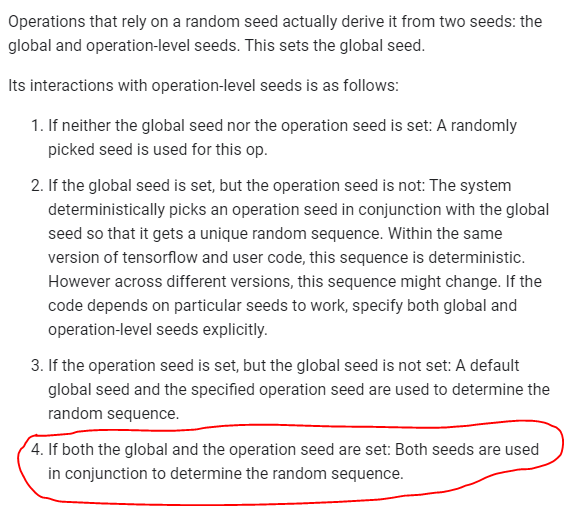

In [30]:
tf.random.set_seed(42) # global level random seed
tf.random.shuffle(not_shuffled, seed=42) # operation level random seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

### Other ways to make tensors

In [31]:
# Create a tensor of all ones
tf.ones([10, 7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [33]:
# Create a tensor of all zeros
tf.zeros(shape=(3, 4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Turn NumPy arrays into tensors

> The main difference between NumPy arrays and TensorFlow tensors is that tensors is that tensors can be run on a GPU computing

In [35]:
# We can also turn NumPy arrays into tensors
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32) # create a NumPy array between 1 to 25
numpy_A

# X = tf.constant(some_matix) # capital for matrix or tensor
# y = tf.constant(vector) # npn-capital for vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [36]:
# Converting NumPy array to tensor
A = tf.constant(numpy_A)
A

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

In [39]:
# Since there is 24 elements in the created array
2 * 3 * 4

24

In [38]:
# Shape (2 * 3 * 4 = 24)
A = tf.constant(numpy_A, shape=(2, 3, 4))
B = tf.constant(numpy_A)
A, B

(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

In [40]:
3 * 8

24

In [41]:
# Shape (3 * 8 = 24)
A = tf.constant(numpy_A, shape=(3, 8))
B = tf.constant(numpy_A)
A, B

(<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
 array([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16],
        [17, 18, 19, 20, 21, 22, 23, 24]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

In [42]:
A.ndim

2

### Getting information from tensors

>When dealing with tensors We probably want to be aware of the following attributes:
* Shape
* Rank
* Axis or dimension
* Size

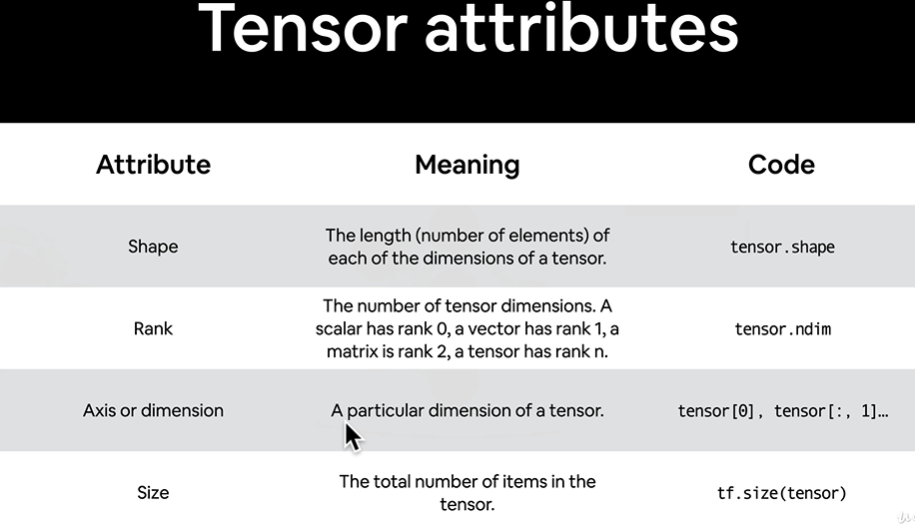

In [43]:
# Create a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros(shape=([2, 3, 4, 5]))
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [44]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [45]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [46]:
# Size
2 * 3 * 4 * 5

120

In [48]:
# Get various attributes of our tensor
print("Datatype of every element: ", rank_4_tensor.dtype)
print("Number of dimensions (rank): ", rank_4_tensor.ndim)
print("Shape of tensor: ", rank_4_tensor.shape)
print("Elements along the 0 axis: ", rank_4_tensor.shape[0])
print("Elements along the last axis: ", rank_4_tensor.shape[-1])
print("Total number of elements in our tensor: ", tf.size(rank_4_tensor))
print("Total number of elements in our tensor (NumPy): ", tf.size(rank_4_tensor).numpy())

Datatype of every element:  <dtype: 'float32'>
Number of dimensions (rank):  4
Shape of tensor:  (2, 3, 4, 5)
Elements along the 0 axis:  2
Elements along the last axis:  5
Total number of elements in our tensor:  tf.Tensor(120, shape=(), dtype=int32)
Total number of elements in our tensor (NumPy):  120


### Indexing tensors

>Tensors can be indexed just like Python lists

In [49]:
# Get the first 2 elements of each dimension
rank_4_tensor[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [55]:
rank_4_tensor.shape

TensorShape([2, 3, 4, 5])

In [54]:
# Get the first element from each dimension from each index except for the final one
rank_4_tensor[:1, :1, :1, :1]

<tf.Tensor: shape=(1, 1, 1, 1), dtype=float32, numpy=array([[[[0.]]]], dtype=float32)>

In [56]:
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10, 7],
                             [3, 4]])

rank_2_tensor.shape, rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

In [57]:
# Get the last item of each of row of our rank 2 tensor
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [59]:
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [58]:
# Add in extra dimension to our rank 2 tensor
rank_3_tensor = rank_2_tensor[..., tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [60]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=-1) # "-1" means expand the final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [61]:
# Expand the 0-axis
tf.expand_dims(rank_2_tensor, axis=0) # "0" means expand the 0-axis

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]], dtype=int32)>

In [62]:
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

### Manipulating tensors (tensor operations)

**Basic operations**

`+`, `-`, `*`, `/`

In [63]:
# You can add values to a tensor using the addition operator
tensor = tf.constant([[10, 7], [3, 4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [64]:
# Original tensor is unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [65]:
# Multiplication
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [66]:
# Substraction
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

In [67]:
# We can use the tensorflow built-in function too
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

**Matrix multiplication**

In machine learning, matrix multiplication is one of the most common tensor operations.

There are two rules our tensors (or matrics) need to fulfil if We're going to matrix multiply them:

1. The inner dimensions must match
2. The resulting matrix has the shape of the outer dimensions


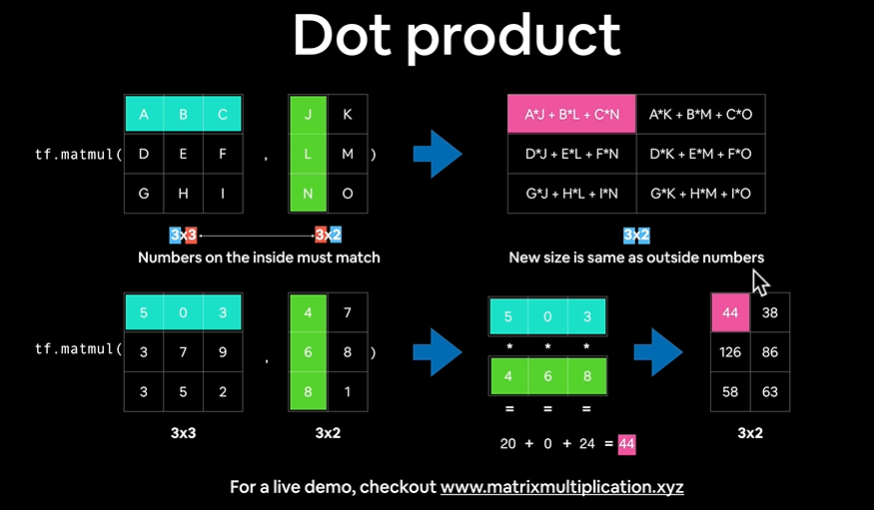

In [72]:
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [70]:
# Matrix multiplication in tensorflow
print(tensor)
tf.matmul(tensor, tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [71]:
tensor * tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  49],
       [  9,  16]], dtype=int32)>

In [73]:
# Matrix mutiplication with python operator "@"
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [74]:
tensor.shape

TensorShape([2, 2])

In [75]:
# Create a tensor (3, 2) tensor
X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])
# Create another (3, 2) tensor
Y = tf.constant([[7, 8],
                 [9, 10],
                 [11, 12]])

X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [76]:
# Try to matrix multipy tensors of same shape
tf.matmul(X, Y)

InvalidArgumentError: ignored

In [77]:
# Try to matrix multipy tensors of same shape
X @ Y

InvalidArgumentError: ignored

📚 **Resource:** Info and example of matrix multiplication: https://mathsisfun.com/algebra/matrix-multiplying.html

In [79]:
Y

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 7,  8],
       [ 9, 10],
       [11, 12]], dtype=int32)>

In [80]:
# Let's change the shape of Y
tf.reshape(Y, shape=(2, 3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [81]:
X.shape, tf.reshape(Y, shape=(2, 3)).shape

(TensorShape([3, 2]), TensorShape([2, 3]))

In [83]:
# Try to matrix multiply X by reshaped Y
X @ tf.reshape(Y, shape=(2, 3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [84]:
tf.matmul(X, tf.reshape(Y, shape=(2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [85]:
# Try change the shape of X instead of Y
tf.matmul(tf.reshape(X, shape=(2, 3)), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]], dtype=int32)>

In [86]:
tf.reshape(X, shape=(2, 3)).shape, Y.shape

(TensorShape([2, 3]), TensorShape([3, 2]))

In [87]:
# Can do the same with transpose
X, tf.transpose(X), tf.reshape(X, shape=(2, 3))

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

In [89]:
Y

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 7,  8],
       [ 9, 10],
       [11, 12]], dtype=int32)>

In [88]:
# Try matrix multiplication with transpose rather than reshape
tf.matmul(tf.transpose(X), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

**The Dot Product**

Matrix multiplication is also referred to as the dot product.
You can perform matrix multiplication using:
* `tf.matmul()`
* `tf.tensordot()`
* `@`

In [90]:
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [91]:
# Perform the dot product on X and Y (requires X or Y to be transposed)
tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [92]:
# Perform matrix mutliplication between X and Y (transposed)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [93]:
# Perform matrix mutliplication between X and Y (reshaped)
tf.matmul(X, tf.reshape(Y, shape=(2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [94]:
# Check the values of Y, reshape Y and transposed Y
print("Normal Y:")
print(Y, "\n")

print("Y reshaped to (2, 3)")
print(tf.reshape(Y, (2, 3)), "\n")

print("Y transposed:")
print(tf.transpose(Y))

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2, 3)
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


In [95]:
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

🔑 **Note:** Generally, when performing matrix multiplication on two tensors and one of the axes doesn't line up, We will transpose (rather than reshape) one of the tensors to get satisfy the matrix mutiplication rules

### Changing the datatype of a tensor

In [99]:
# Create a new tenspr with the default datatype (float32)
B = tf.constant([1.7, 7.4])
B, B.dtype

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 7.4], dtype=float32)>,
 tf.float32)

In [100]:
C = tf.constant([7, 10])
C, C.dtype

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>,
 tf.int32)

In [101]:
# Change from float32 to float16 (reduced precision)
D = tf.cast(B, dtype=tf.float16)
D, D.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>,
 tf.float16)

In [102]:
# Change from int32 to float32
E = tf.cast(C, dtype=tf.float32)
E, E.dtype

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7., 10.], dtype=float32)>,
 tf.float32)

In [103]:
E_float16 = tf.cast(E, dtype=tf.float16)
E_float16, E_float16.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([ 7., 10.], dtype=float16)>,
 tf.float16)

### Aggregating tensors

>Aggregating tensors - condensing them from multiple values down to a smaller amount of values.

In [104]:
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [105]:
# Get the absolute values
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

Let's go throgh the following forms of aggregations
* Get the minimum
* Get the maximum
* Get the mean of a tensor
* Get the sum of a tensor

In [107]:
# Creating a random tensor with values between 0 and 100 of size 50
E = tf.constant(np.random.randint(0, 100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([91, 33, 19, 16, 76, 51,  3, 66, 29, 47, 26, 28, 45, 21, 94, 52, 98,
       59, 52, 93, 38, 74, 12, 93, 62, 19, 91, 67, 40, 21, 70,  8, 17, 38,
       42, 10, 17, 82, 50, 30,  6, 21, 29, 88, 96, 63, 84, 83, 78, 33])>

In [108]:
tf.size(E), E.shape, E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [109]:
# Find the minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=3>

In [110]:
# Find the maximum
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=98>

In [111]:
# Find the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=49>

In [112]:
# Find the sum
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2461>

🛠️ **Exercise:** With what We've just learned, find the variance and the standard deviation of `E` tensor using TensorFlow methods.

In [113]:
# Find the variance of our tensor
tf.reduce_variance(E) # won't work...

AttributeError: ignored

In [114]:
# To find the variance of our tensor, We need access to tensorflow_probability
import tensorflow_probability as tfp
tfp.stats.variance(E)

<tf.Tensor: shape=(), dtype=int64, numpy=832>

In [116]:
tf.math.reduce_std(E) # For standard deviation complex datatype supported eg. float32

TypeError: ignored

In [115]:
# Find the standard deviation for E tensor
tf.math.reduce_std(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=28.851543>

In [117]:
# Find the variance for E tensor
tf.math.reduce_variance(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=832.41156>

###Find the positional maximum and minimum

In [118]:
# Create a new tensor for finding positional minimum and maximum
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [119]:
# find the positional maximum
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [120]:
# Index on our largest vlaue position
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [121]:
# Find the max value of F
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [122]:
# Check for equality
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [123]:
# Find the positional minimum
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [124]:
# Find the minimum using the positional minimum index
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

### Squeezing a tensor (removing all single dimensions)

In [125]:
# Create a tensor to get started
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1, 1, 1, 1, 50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [126]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [127]:
G_squeezed = tf.squeeze(G)
G_squeezed, G_squeezed.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
        0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
        0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
        0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
        0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
        0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
        0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
        0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
        0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
        0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
       dtype=float32)>, TensorShape([50]))

### One-hot encoding tensors

>One-hot encoding is a form of numerical encode

In [128]:
# Create a list of indices
some_list = [0, 1, 2, 3] # could be red, green, blue & purple

# One hot encode our list of indices
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [130]:
# Specify custom values for one hot encoding
tf.one_hot(some_list, depth=4, on_value="true", off_value="false")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'true', b'false', b'false', b'false'],
       [b'false', b'true', b'false', b'false'],
       [b'false', b'false', b'true', b'false'],
       [b'false', b'false', b'false', b'true']], dtype=object)>

### Squaring, log, square root

In [131]:
# Create a new tensor
H = tf.range(1, 10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [132]:
# Find the Square
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [134]:
# Find the squareroot (Will error, method requires non-int type)
tf.sqrt(H)

InvalidArgumentError: ignored

In [133]:
# Find the Square root
tf.sqrt(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.99999994, 1.4142134 , 1.7320508 , 1.9999999 , 2.236068  ,
       2.4494896 , 2.6457512 , 2.8284268 , 3.        ], dtype=float32)>

In [135]:
# Find the log
tf.math.log(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

### Tensors and NumPy

>TensorFlow interacts so good with NumPy array

In [138]:
# Create a tensor directly from a NumPy array
J = tf.constant(np.array([3., 7., 10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [139]:
# Convert our tensor back to NumPy array
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [140]:
# Convert tensor J to a NumPy array
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [142]:
J = tf.constant([3.])
J.numpy()[0]

3.0

In [143]:
# The default types of each are slightly different
numpy_J = tf.constant(np.array([3., 7., 10.]))
tensor_J = tf.constant([3., 7., 10.])
# Check the datatype of each
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

### Finding access to GPUs

In [1]:
import tensorflow as tf

In [2]:
# Check available devices
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [4]:
# Check whether GPU is connected
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
# Check whether TPU is connected
tf.config.list_physical_devices("TPU")

[]

In [6]:
!nvidia-smi

Sun Jul  4 18:59:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    29W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

> 🔑 **Note:** If we have access to a CUDA-anabled GPU, TensorFlow will automatically run on it.